*This project predicts the calories that a user (male or female) burns when exercising. The Machine Learning model takes features such as the duration of exercise, average heart beat, the body temperature and also the height and weight.*

**The Workflow **


1.   Data Pre processing
2.   Data Analysis and Visualization
3.   Splitting the data into train and test
4.   Training the model with the train set using the XGBoost     Regressor
5.    Evaluation and prediction by taking input from user.







Importing the dependencies

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

#Importing the data
data_calories = pd.read_csv('calories.csv')
data_exercise = pd.read_csv('exercise.csv')

#Combining calories and exercise data frame
data_calories = pd.concat([data_exercise, data_calories['Calories']], axis=1)

#checking the number of rows and colums
data_calories.head()

#checking the statistical measures about the data
data_calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


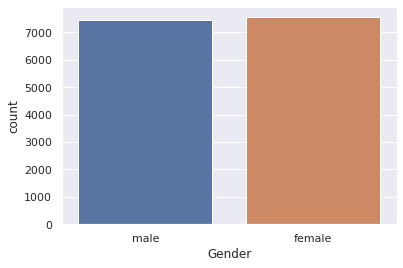

In [5]:
# Data visualization
sns.set()

#Plotting the Gender column in count plot
sns.countplot(data_calories['Gender'])

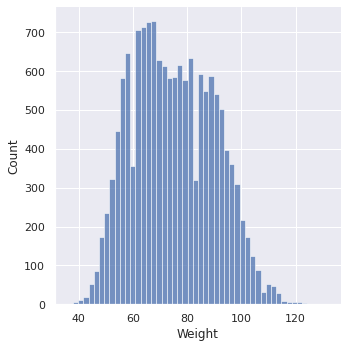

In [6]:
#Finding the distribution of the Age column
sns.displot(data_calories['Weight'])


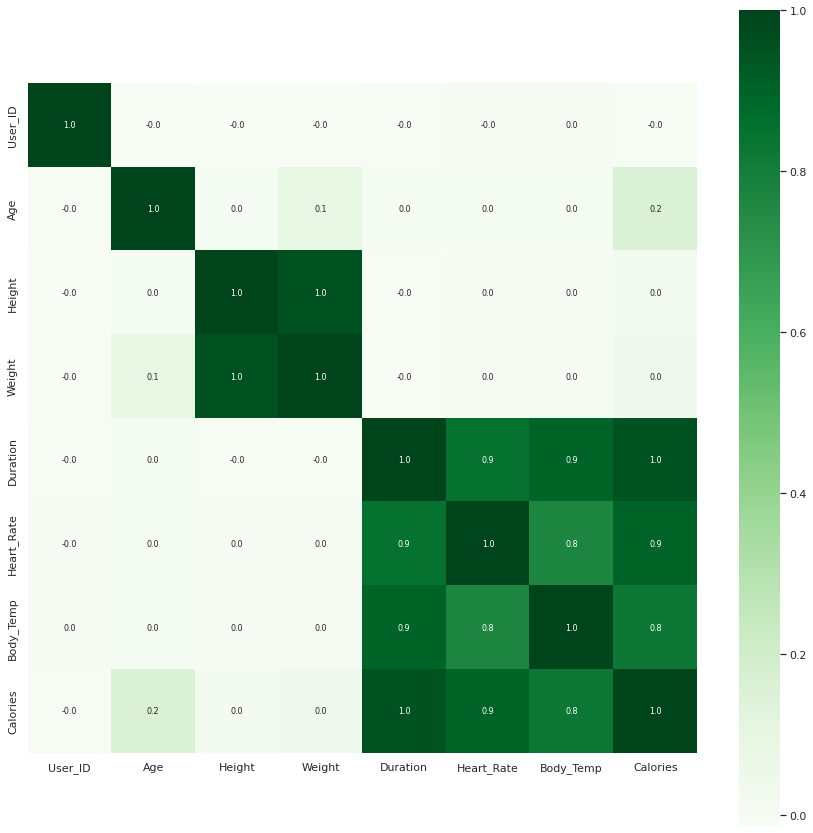

In [7]:
#Heatmap to understand the correlation 
correlation = data_calories.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' :8}, cmap ="Greens")

In [8]:
#Converting the text data to numerical data
data_calories.replace({'Gender' : {'male' : 00, 'female' :1}}, inplace=True)


In [9]:
data_calories.head()
data_calories.shape

(15000, 9)

In [10]:
#Splitting the data set into dependent and independent data
X=data_calories.iloc[:,1:-1].values
X=pd.DataFrame(X)
y=data_calories.iloc[:,-1].values
y=pd.DataFrame(y)

#Y = dataset.iloc[:,-1].values

X.shape

(15000, 7)

In [11]:
#Splitting the data into into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state =2)

y_train.shape

(12000, 1)

Model Training Using XGBoos Regressor

In [12]:
#Loading the Model

regressor=XGBRegressor()

#Training the Model

regressor.fit(X_train,y_train)

[20:38:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [13]:
# Prediction
y_pred = regressor.predict(X_test)
y_pred



array([129.06204 , 223.79721 ,  39.181965, ..., 145.59767 ,  22.53474 ,
        92.29064 ], dtype=float32)

In [14]:
#Model Performance Using Abosolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
mae 

# Evaluating the Model Performance
from sklearn.metrics import r2_score
performance3=r2_score(y_test, y_pred)
mae
performance3

0.9963065655529431

In [15]:
#Taking data from a user for prediction
Gender = input('Enter your Gender: ')
Age = int(input('Enter your Age: '))
Height = float(input('Enter your Height: '))
Weight = float(input('Enter your Weight: '))
Duration = float(input('Enter the duration: '))
Heart_Rate = float(input('Enter your Heart Rate: '))
Body_Temperature = float(input('Enter your Body Temperature: '))

if Gender == 'male':
  Gender1 = 0
else:
  Gender1 =1


X_test_user = [Gender1, Age, Height, Weight, Duration, Heart_Rate, Body_Temperature]
#X_test_user=pd.DataFrame(X_test_user)






Enter your Gender: Male
Enter your Age: 45
Enter your Height: 45
Enter your Weight: 34
Enter the duration: 3
Enter your Heart Rate: 45
Enter your Body Temperature: 43


In [16]:
X_test_user
x1=np.array([X_test_user])

#X_test_user=pd.DataFrame(X_test_user)
#y_pred2 = regressor.predict(X_test_user)
#y_pred2
#X_test_user
#x_1.shape
#x_1 = X_test_user.reshape(1,7)
#x_1

In [17]:
user=pd.DataFrame(x1)


In [18]:
y_pred2 = regressor.predict(user)
y_pred2
print("You burnt", y_pred2[0], 'kcal')

You burnt 10.32618 kcal
